In [20]:
import pandas as pd
import seaborn as sc
import matplotlib.pyplot as plt
from numpy.f2py.cfuncs import includes
import tensorflow as tf
tf.config.list_physical_devices('GPU')
df=pd.read_csv('fmcg_realtime_sales.csv')
#df.describe()
#df.shape
#df.dtypes
df.info
#df.plot()
#df.isna().sum()
#df.interpolate()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
df



Index(['pack_size_ml', 'promo_flag', 'discount_pct', 'competitor_price_index',
       'units_sold', 'base_price_per_unit', 'gross_sales_value',
       'net_sales_value', 'stock_at_start', 'stock_at_end', 'oos_flag',
       'temp_c'],
      dtype='object')


,transaction_id,date,region,city,outlet_type,sales_channel,customer_type,brand,pack_size_ml,pack_type,...,units_sold,base_price_per_unit,gross_sales_value,net_sales_value,stock_at_start,stock_at_end,oos_flag,weather,temp_c,event
0,TXN_000001,2024-12-31,North,Lucknow,Supermarket,Off-Trade,Retail Chain,Local_Brand_B,500,Bottle,...,72,123.37,8882.76,8538.39,110,45,0,Sunny,27.4,Sports_Event
1,TXN_000002,2024-11-18,West,Mumbai,Supermarket,Off-Trade,Modern Trade,Local_Brand_B,330,Bottle,...,96,106.70,10243.49,8039.50,147,56,0,Humid,31.5,Concert
2,TXN_000003,2024-04-08,South,Hyderabad,Bar/Restaurant,On-Trade,HoReCa,Local_Brand_B,650,Bottle,...,79,143.69,11351.29,8391.16,134,58,0,Humid,27.7,NaN
3,TXN_000004,2024-08-18,South,Kochi,E-commerce,Off-Trade,HoReCa,Heineken,500,Bottle,...,38,189.54,7202.61,7148.34,66,35,0,Sunny,28.0,NaN
4,TXN_000005,2024-01-18,South,Hyderabad,E-commerce,Off-Trade,Retail Chain,Local_Brand_A,1000,Can,...,39,206.24,8043.20,7906.33,64,25,0,Sunny,29.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,TXN_002740,2024-07-15,West,Mumbai,Supermarket,Off-Trade,HoReCa,Kingfisher,330,Can,...,24,143.66,3447.75,3338.43,41,22,0,Sunny,30.7,NaN
3006,TXN_000445,2024-10-22,North,Jaipur,Hypermarket,Off-Trade,Modern Trade,Heineken,1000,Bottle,...,89,273.24,24318.03,17551.06,160,71,0,Cool,21.4,NaN
3007,TXN_000281,2024-11-30,West,Pune,E-commerce,Off-Trade,Independent Store,Heineken,1000,Draft,...,47,280.00,13159.91,12920.55,64,18,0,Sunny,28.9,NaN
3008,TXN_000254,2024-05-23,West,Pune,Convenience Store,Off-Trade,HoReCa,Heineken,330,Draft,...,41,167.42,6864.16,5085.06,71,28,0,Cloudy,29.3,NaN


In [18]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))

[]


In [7]:
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())



# Forward fill
#df[num_cols] = df[num_cols].ffill()
df=df.fillna(method="bfill")
df.isna().sum()
type(df['promo_type'])
df.info()
#col=df.select_dtypes(include=['int64','float64'])
#col
#df['promo_type']

#print(df['promo_type'])
#for col in cat_cols:
 #   plt.figure(figsize=(6,6))
  #  df[col].value_counts().plot.pie(autopct="%1.1f%%")
   # plt.title(f"Pie Chart - {col}")
    #plt.ylabel("")
    #plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          3010 non-null   object 
 1   date                    3010 non-null   object 
 2   region                  3010 non-null   object 
 3   city                    3010 non-null   object 
 4   outlet_type             3010 non-null   object 
 5   sales_channel           3010 non-null   object 
 6   customer_type           3010 non-null   object 
 7   brand                   3010 non-null   object 
 8   pack_size_ml            3010 non-null   int64  
 9   pack_type               3010 non-null   object 
 10  promo_flag              3010 non-null   int64  
 11  promo_type              3009 non-null   object 
 12  discount_pct            3010 non-null   float64
 13  competitor_price_index  3010 non-null   float64
 14  units_sold              3010 non-null   

/var/folders/bp/zhhmsgsj5wqc3mcx7hb1mkw40000gn/T/ipykernel_55029/2509709099.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="bfill")


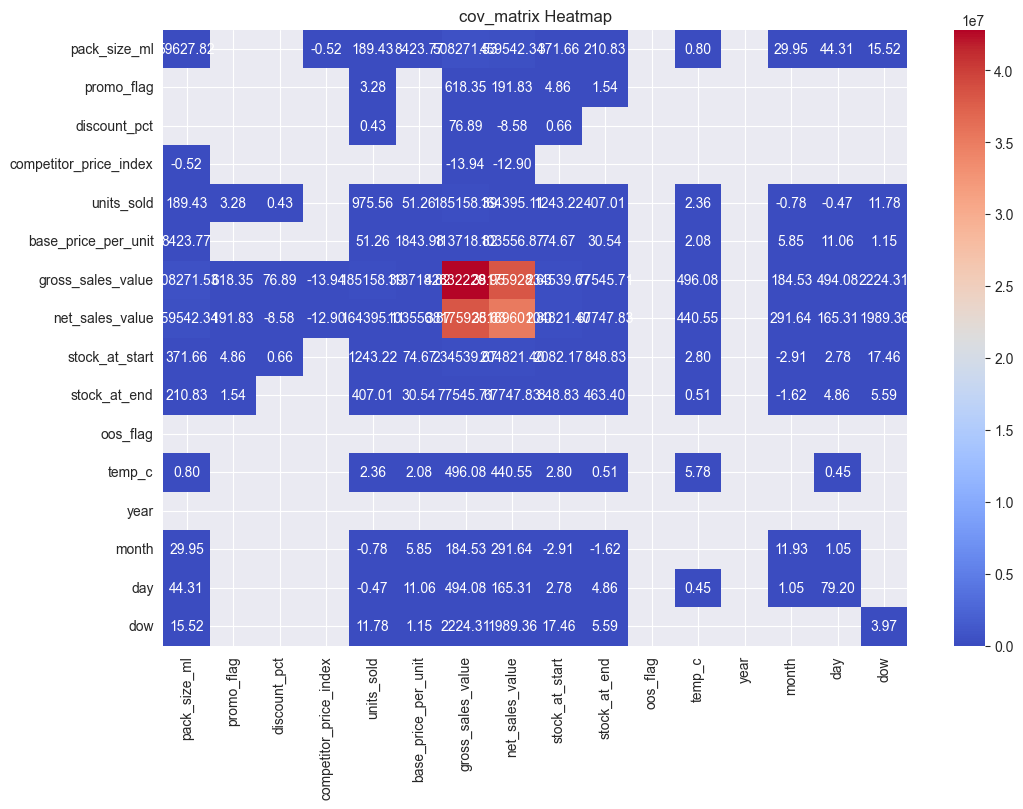

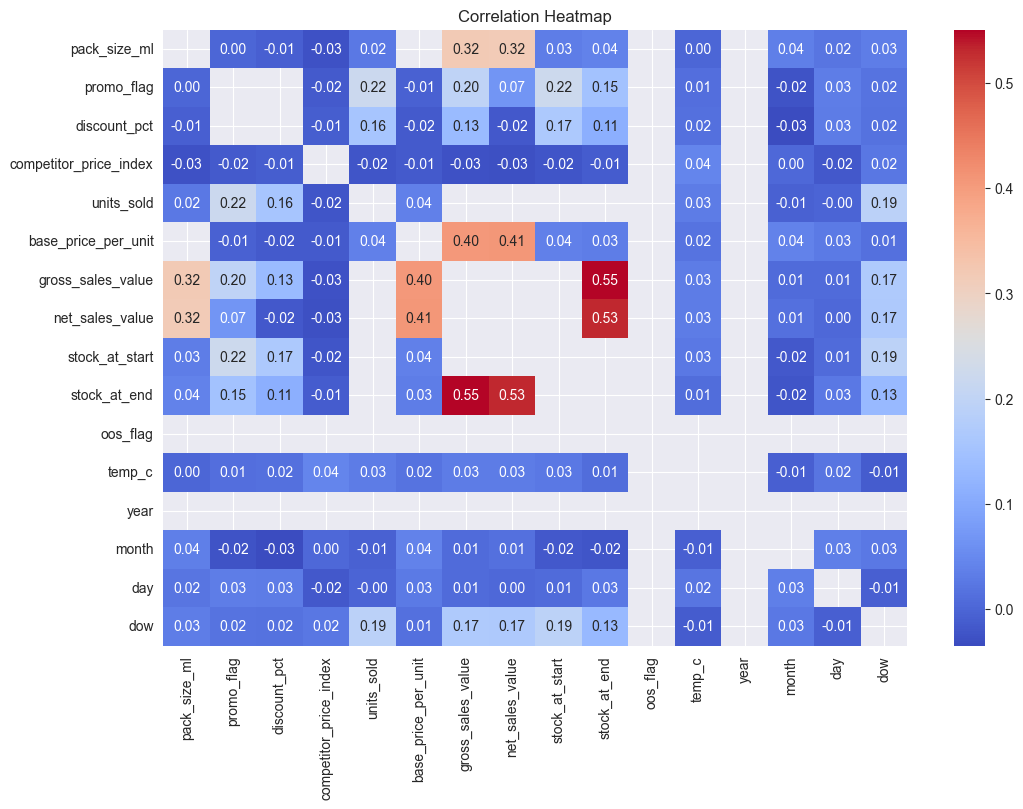

16
pack_size_ml 0
promo_flag 0
discount_pct 0
competitor_price_index 0
units_sold 0
base_price_per_unit 0
gross_sales_value 0
net_sales_value 0
stock_at_start 0
stock_at_end 0
oos_flag 0
temp_c 0
year 0
month 0
day 0
dow 0
cov_matrix pack_size_ml              12
promo_flag                 5
discount_pct               4
competitor_price_index     3
units_sold                13
base_price_per_unit       11
gross_sales_value         14
net_sales_value           14
stock_at_start            13
stock_at_end              12
oos_flag                   0
temp_c                     9
year                       0
month                      9
day                       10
dow                        8
dtype: int64
corr_matrix pack_size_ml              12
promo_flag                12
discount_pct              12
competitor_price_index    13
units_sold                 9
base_price_per_unit       12
gross_sales_value         10
net_sales_value           10
stock_at_start             9
stock_at_end    

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dow'] = df['date'].dt.dayofweek
cat_cols = df.select_dtypes(include='number').columns
cov_matrix = df.select_dtypes(include='number').cov()
cov_matrix=cov_matrix[(cov_matrix.abs()>.3) & (cov_matrix!=1)]
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix=corr_matrix[(corr_matrix.abs()<.6) & (corr_matrix!=1)]
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("cov_matrix Heatmap")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print(len(cat_cols))
for col in cat_cols:
    print(f"{col} {df[col].isna().sum()}")

print('cov_matrix',cov_matrix.count())
print('corr_matrix',corr_matrix.count())


In [10]:
import time
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

/Users/ajaikolarikal/PyCharmMiscProject/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,738 (65.38 KB)

 Trainable params: 16,738 (65.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1951 - mean_absolute_error: 0.7388 - val_loss: 1.1156 - val_mean_absolute_error: 0.7433
Epoch 2/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 1.0576 - mean_absolute_error: 0.6855 - val_loss: 1.0344 - val_mean_absolute_error: 0.7132
Epoch 3/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 1.2838 - mean_absolute_error: 0.7004 - val_loss: 0.9612 - val_mean_absolute_error: 0.6845
Epoch 4/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.8278 - mean_absolute_error: 0.6203 - val_loss: 0.8925 - val_mean_absolute_error: 0.6557
Epoch 5/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.8686 - mean_absolute_error: 0.6188 - val_loss: 0.8248 - val_mean_absolute_error: 0.6262
Epoch 6/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.7912 - mean_absolute_error: 0.5788 - val_loss: 0.7620 - val_mean_absolute_error: 0.5967
Epoch 7/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.7442 - mean_absolute_error: 0.542

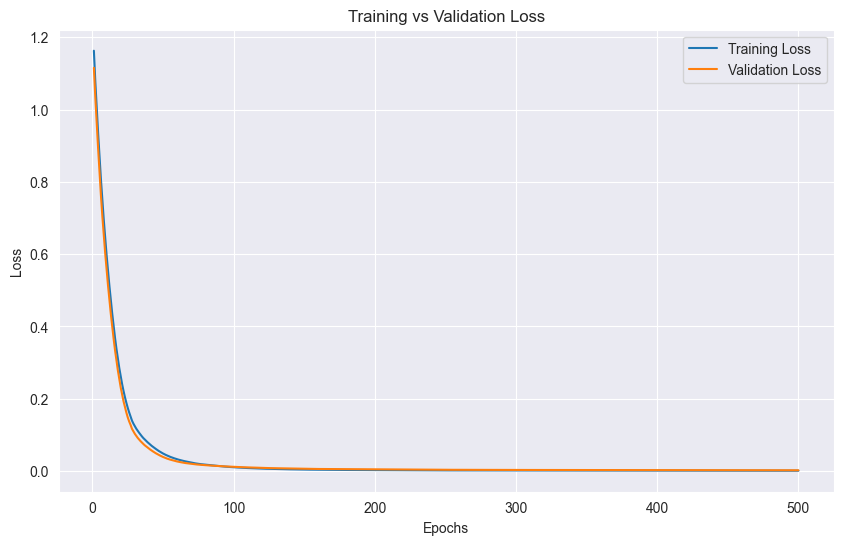

In [11]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

from sklearn.preprocessing import StandardScaler



model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.celu, input_shape=(len(corr_matrix),)),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),

    # Output Layer: 2 values → gross_sales_value & units_sold
    tf.keras.layers.Dense(2, activation='linear')
])
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)

feature_cols = num_cols  # or your list of input columns

target_cols = ['gross_sales_value', 'units_sold']

x = df[cat_cols].values
y = df[target_cols].values
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(x)
#X_test_scaled = x_scaler.transform(X_test)

# scale y (IMPORTANT)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y)
#y_test_scaled = y_scaler.transform(y_test)
model.summary()
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[es,time_callback]
)
loss, mae = model.evaluate(X_train_scaled, y_train_scaled)
print("MAE:", mae)
print("Time per epoch:", time_callback.times)
print("Average epoch time:", sum(time_callback.times) / len(time_callback.times))
print('Training complete total time:', sum(time_callback.times), 'seconds')
import matplotlib.pyplot as plt

# history.history contains all metrics recorded during training
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()